In [1]:
# Import relevant libraries
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.metrics import structural_similarity as compare_ssim
import cv2
import copy
import pandas as pd
from skimage.feature import hog
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [2]:
# Function for producing differenced image at RGB color channels

def img_diff(orig_image, new_image):
    # Convert images to grayscale
    imageA = copy.deepcopy(orig_image)
    imageB = copy.deepcopy(new_image)
    grayA = cv2.cvtColor(imageA, cv2.COLOR_RGB2GRAY)
    grayB = cv2.cvtColor(imageB, cv2.COLOR_RGB2GRAY)

    # compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = compare_ssim(grayA, grayB, full=True)
    diff = (diff * 255).astype("uint8")

    # threshold the difference image, followed by finding contours to
    # obtain the regions of the two input images that differ
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Display image differences
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(imageA)
    axarr[0,1].imshow(imageB)
    axarr[1,0].imshow(diff)
    axarr[1,1].imshow(thresh)

    # Return the differenced threshold image
    return thresh

In [3]:
# Load images
img_names = ['San_Cristobal-2020-01-26.png','San_Cristobal-2020-03-01.png','San_Cristobal-2020-03-08.png',
             'San_Cristobal-2020-03-15.png','San_Cristobal-2020-03-22.png','San_Cristobal-2020-04-05.png',
             'San_Cristobal-2021-01-17.png','San_Cristobal-2021-01-31.png','San_Cristobal-2021-02-07.png',
             'San_Cristobal-2021-02-28.png','San_Cristobal-2021-03-07.png']
img_list3 = []
for image in img_names:
    new_img_string = 'sample_images/' + image
    new_img = plt.imread(new_img_string)
    img_list3.append(new_img)

In [4]:
# Find minimum rows and columns across images
r_list = []
c_list = []

for i in range(len(img_list3)):
    r_list.append(img_list3[i].shape[0])
    c_list.append(img_list3[i].shape[1])

min_rows = min(r_list)
min_cols = min(c_list)

In [5]:
# Create function to crop center of image 
def crop_image_center(img, rows, cols):
    
    # Find starting coordinates of top left corner of center crop
    start_row = (img.shape[0] - rows) // 2
    start_col = (img.shape[1] - cols) // 2
    
    new_image = copy.deepcopy(img[start_row:start_row+rows, start_col:start_col+cols, :])
    
    return new_image

In [6]:
# Crop images to get exact same dimensions across dataset
new_im0 = crop_image_center(img_list3[0], min_rows, min_cols)
new_im1 = crop_image_center(img_list3[1], min_rows, min_cols)
new_im2 = crop_image_center(img_list3[2], min_rows, min_cols)
new_im3 = crop_image_center(img_list3[3], min_rows, min_cols)
new_im4 = crop_image_center(img_list3[4], min_rows, min_cols)
new_im5 = crop_image_center(img_list3[5], min_rows, min_cols)
new_im6 = crop_image_center(img_list3[6], min_rows, min_cols)
new_im7 = crop_image_center(img_list3[7], min_rows, min_cols)
new_im8 = crop_image_center(img_list3[8], min_rows, min_cols)
new_im9 = crop_image_center(img_list3[9], min_rows, min_cols)
new_im10 = crop_image_center(img_list3[10], min_rows, min_cols)

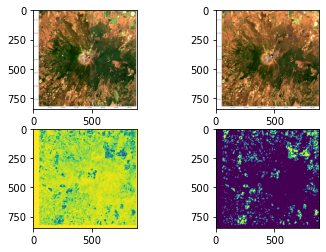

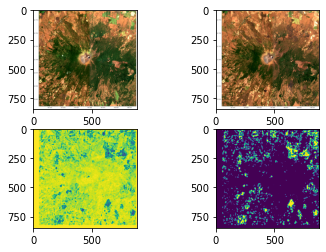

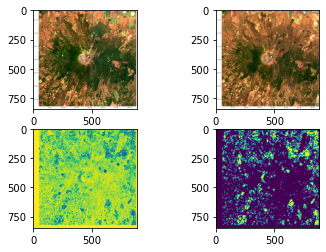

In [7]:
# Test the image differencing function
diff_img1 = img_diff(new_im0, new_im1)
diff_img2 = img_diff(new_im0, new_im2)
diff_img3 = img_diff(new_im0, new_im3)

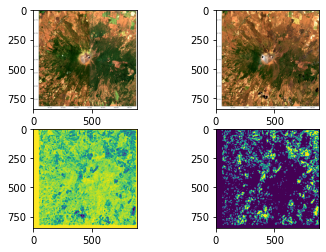

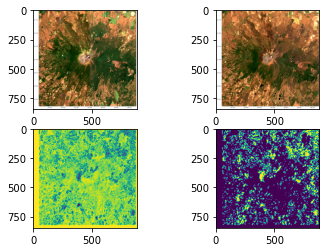

In [8]:
# Test the image differencing function
diff_img4 = img_diff(new_im0, new_im4)
diff_img5 = img_diff(new_im0, new_im5)

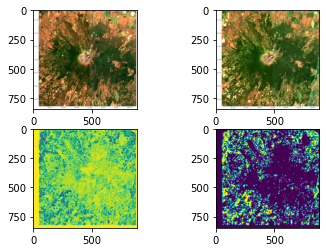

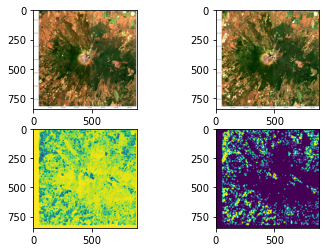

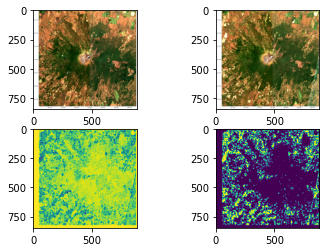

In [9]:
# Test the image differencing function
diff_img6 = img_diff(new_im0, new_im6)
diff_img7 = img_diff(new_im0, new_im7)
diff_img8 = img_diff(new_im0, new_im8)

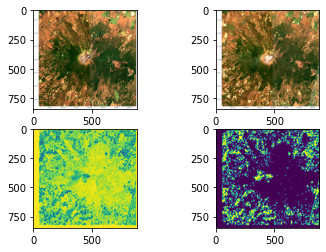

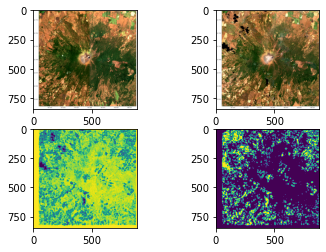

In [10]:
# Test the image differencing function
diff_img9 = img_diff(new_im0, new_im9)
diff_img10 = img_diff(new_im0, new_im10)

In [13]:
# Create image labels and list of differenced images
img_labels = [0,0,0,1,1,1,0,0,1,1]
diff_img_list = [diff_img1, diff_img2, diff_img3, diff_img6, diff_img7,
                 diff_img8, diff_img4, diff_img5, diff_img9, diff_img10]

In [14]:
# Check image dimensions are now consistent
print(diff_img1.shape)
print(diff_img2.shape)

(846, 886)
(846, 886)


In [15]:
# Create function for HOG features

def get_hog(image_set, orient_count, pix_per_cell):
    
    # Initialize list for features and sample images
    feat_list = []
    total_img_count = len(image_set)
  
    # Iterate over images, get HOG features, then stack feature values together
    for z in range(total_img_count):
        orig_im = copy.deepcopy(image_set[z])
        fd, hog_image = hog(orig_im, orientations=orient_count,
                            pixels_per_cell=(pix_per_cell, pix_per_cell), 
                            cells_per_block=(2, 2), visualize=True, multichannel=False)
        feat_list.append(fd[np.newaxis, :])
        
    total_hog = np.vstack(feat_list)
        
    return total_hog

In [24]:
# Attempt different combinations of HOG parameters: orientations and pixels per cell
explained_var_track = []
orient_track = []
pix_track = []

# After getting HOG results for different parameters, calculate the PCA top 8 explained variance 
t1a = get_hog(diff_img_list, 4, 10)
pca3 = PCA(n_components=8, svd_solver="randomized", random_state=7).fit(t1a)
explained_var_track.append(sum(pca3.explained_variance_ratio_))
orient_track.append(4)
pix_track.append(10)

t2a = get_hog(diff_img_list, 4, 9)
pca3 = PCA(n_components=8, svd_solver="randomized", random_state=7).fit(t2a)
explained_var_track.append(sum(pca3.explained_variance_ratio_))
orient_track.append(4)
pix_track.append(9)

t3a = get_hog(diff_img_list, 4, 8)
pca3 = PCA(n_components=8, svd_solver="randomized", random_state=7).fit(t3a)
explained_var_track.append(sum(pca3.explained_variance_ratio_))
orient_track.append(4)
pix_track.append(8)

t4a = get_hog(diff_img_list, 4, 7)
pca3 = PCA(n_components=8, svd_solver="randomized", random_state=7).fit(t4a)
explained_var_track.append(sum(pca3.explained_variance_ratio_))
orient_track.append(4)
pix_track.append(7)

# Produce table to summarize PCA top 8 explained variance for different parameters for HOG
eda_df4 = pd.DataFrame({'orientations': orient_track,
                        'pixels_per_cell': pix_track,
                        'explained_var': explained_var_track})

print(eda_df4.sort_values("explained_var", ascending=False))

   orientations  pixels_per_cell  explained_var
3             4                7       0.953532
0             4               10       0.953502
1             4                9       0.951522
2             4                8       0.950976


In [28]:
# Get HOG features using the best parameters previously found: 4 for orientations and 10 for pixels per cell
hog_feat = get_hog(diff_img_list, 4, 10)

# Get top 8 features for HOG using PCA
pca_hog = PCA(n_components=8, svd_solver="randomized", random_state=7).fit(hog_feat)
X_pca_hog = pca_hog.transform(hog_feat)

# Check dimensions of top 5 features for HOG after PCA
print(X_pca_hog.shape)

(10, 8)


In [29]:
# Convert training set and test set labels and features to numpy arrays
y_train = np.array(img_labels[:6])
y_test = np.array(img_labels[6:])

X_train = X_pca_hog[0:6, :]
X_test = X_pca_hog[6:, :]

# Normalize feature values using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Create function to calculate classification accuracy
def get_accuracy(predicted, actual):
    correct_count = 0
    for i in range(len(predicted)):
        if predicted[i]==actual[i]:
            correct_count += 1
    return float(correct_count) / len(predicted)

# Fit SVM model
svm1 = SVC(C=3, kernel='rbf').fit(X_train, y_train)

# Get predictions on training set and calculate classification accuracy
y_predict2 = svm1.predict(X_train)
print("SVM model training set accuracy is: ")
print(get_accuracy(y_predict2, y_train))

# Get predictions on validation set and calculate classification accuracy
y_predict3 = svm1.predict(X_test)
print("SVM model validation set accuracy is: ")
print(get_accuracy(y_predict3, y_test))

SVM model training set accuracy is: 
1.0
SVM model validation set accuracy is: 
0.75


In [31]:
# Print classification report
print(classification_report(y_predict3, y_test))


              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4

